In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [15]:
#Lecture de la base de donnée 
df=pd.read_csv("D:/Python-R/Databases/for info/ebay.csv")
#vendus est une data frame qui contient que les chossures vendus 
vendus=df.loc[df["vendus"]==1]
non_vendus=df.loc[df["vendus"]==0]
vendus["diffprix"]=vendus["prixvente"]-vendus["prixdepart"]
#meme chose pour enchere
enchere=df.loc[df["enchere"]==1]
non_enchere=df.loc[df["vendus"]==0]
enchere["diffprix"]=enchere["prixvente"]-enchere["prixdepart"]
df

C:\Users\tatai\AppData\Local\Temp\ipykernel_11920\3023007025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendus["diffprix"]=vendus["prixvente"]-vendus["prixdepart"]
C:\Users\tatai\AppData\Local\Temp\ipykernel_11920\3023007025.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enchere["diffprix"]=enchere["prixvente"]-enchere["prixdepart"]


,enchere,vendus,prixdepart,prixvente,etat,taille,talon,style,couleur,materiel
0,1,0,199.00,NaN,Pre-owned,9.5,Low,Open Toe,Black,Suede
1,0,0,375.00,NaN,New with box,7.5,High,Slingback,Other/Missing,Satin
2,1,1,299.99,780.0,Pre-owned,8.5,High,Pump,Black,Other/Missing
3,1,1,49.99,561.0,Pre-owned,8.5,High,Pump,Black,Snakeskin
4,0,0,89.00,NaN,Pre-owned,5.5,Flat,Other/Missing,Other/Missing,Leather
...,...,...,...,...,...,...,...,...,...,...
3791,0,0,78.50,NaN,New without box,NaN,NaN,Slingback,Other/Missing,Other/Missing
3792,0,0,899.00,NaN,New with box,8.0,High,Pump,Beige,Patent Leather
3793,0,0,1895.00,NaN,New with box,7.0,High,Pump,Beige,Snakeskin
3794,0,0,695.00,NaN,New with box,8.5,High,Pump,Black,Patent Leather


In [16]:
#Question1
cnv=list(df.shape)
print(f"Il y'a {cnv[0]} articles dans cette base de donnees")

Il y'a 3796 articles dans cette base de donnees


In [17]:
#Q2.1
chossures_non_vendus=cnv[0]-df["vendus"].sum()
print(f"Nombre de chossures non vendus est {chossures_non_vendus}")

Nombre de chossures non vendus est 2997


In [18]:
#Q2.2 (pourcentage) 
print(f"avec un pourcentage de {(chossures_non_vendus*100/cnv[0]).round(2)}%")

avec un pourcentage de 78.95%


In [19]:
#Q3.1
df.isna().sum()

enchere          0
vendus           0
prixdepart       0
prixvente     2997
etat             0
taille          68
talon          961
style            0
couleur          0
materiel         0
dtype: int64

In [20]:
"""Les valeurs manqauntes dans cette base de donnée sont logique car les NaN sont dans la column (prixvente) et logiquement
si il n y'a pas de vente y'aura pas de prix de vente""" 

"Les valeurs manqauntes dans cette base de donnée sont logique car les NaN sont dans la column (prixvente) et logiquement\nsi il n y'a pas de vente y'aura pas de prix de vente"

In [21]:
###La variable numerique qui contient au moins une variable manquante est le prix de vente

In [22]:
#Q4 la taille la plus communne
f=list(df["taille"].mode())
print(f"La taille la plus communne est {f[0]}")

La taille la plus communne est 8.0


In [23]:
#Q5
frec1=df["etat"].value_counts()
frec1
k1=frec1.keys()
v1=frec1.values
etatf=pd.DataFrame({"etat":k1,"frequence":v1})
etatf

,etat,frequence
0,Pre-owned,2367
1,New with box,1092
2,New without box,257
3,New with defects,80


In [24]:
frec2=df["materiel"].value_counts()
frec2
k2=frec2.keys()
v2=frec2.values
etatf1=pd.DataFrame({"materiel":k2,"frequence":v2})
etatf1

,materiel,frequence
0,Other/Missing,1172
1,Leather,975
2,Patent Leather,928
3,Suede,450
4,Satin,158
5,Snakeskin,113


In [25]:
frec3=df["couleur"].value_counts()
frec3
k3=frec3.keys()
v3=frec3.values
etatf2=pd.DataFrame({"couleur":k3,"frequence":v3})
etatf2

,couleur,frequence
0,Other/Missing,1689
1,Black,1330
2,Beige,411
3,Red,192
4,Brown,174


In [26]:
frec4=df["style"].value_counts()
frec4
k4=frec4.keys()
v4=frec4.values
etatf3=pd.DataFrame({"style":k4,"frequence":v4})
etatf3

,style,frequence
0,Pump,1719
1,Platform,622
2,Other/Missing,486
3,Open Toe,398
4,Slingback,342
5,Stiletto,229


In [27]:
fv=vendus["etat"].value_counts()
v5=fv.values
fnv=non_vendus["etat"].value_counts()
v6=fnv.values
fnv
var=pd.DataFrame({"etat":k1,"fvendus":v5,"fnvendus":v6,"ftotal":v1})
var

,etat,fvendus,fnvendus,ftotal
0,Pre-owned,544,1823,2367
1,New with box,180,912,1092
2,New without box,55,202,257
3,New with defects,20,60,80


In [28]:
fv1=vendus["materiel"].value_counts()
v7=fv1.values
fnv1=non_vendus["materiel"].value_counts()
v8=fnv1.values
var1=pd.DataFrame({"materiel":k2,"fvendus":v7,"fnvendus":v8,"ftotal":v2})
var1

,materiel,fvendus,fnvendus,ftotal
0,Other/Missing,237,935,1172
1,Leather,215,760,975
2,Patent Leather,207,721,928
3,Suede,98,352,450
4,Satin,24,134,158
5,Snakeskin,18,95,113


In [29]:
fv2=vendus["couleur"].value_counts()
v9=fv2.values
fnv2=non_vendus["couleur"].value_counts()
v10=fnv2.values
var2=pd.DataFrame({"couleur":k3,"fvendus":v9,"fnvendus":v10,"ftotal":v3})
var2

,couleur,fvendus,fnvendus,ftotal
0,Other/Missing,317,1373,1689
1,Black,316,1013,1330
2,Beige,95,316,411
3,Red,42,150,192
4,Brown,29,145,174


In [30]:
fv3=vendus["style"].value_counts()
v11=fv3.values
fnv3=non_vendus["style"].value_counts()
v12=fnv3.values
var3=pd.DataFrame({"style":k4,"fvendus":v11,"fnvendus":v12,"ftotal":v4})
var3

,style,fvendus,fnvendus,ftotal
0,Pump,371,1348,1719
1,Platform,131,515,622
2,Other/Missing,107,355,486
3,Open Toe,74,324,398
4,Slingback,63,289,342
5,Stiletto,53,166,229


In [44]:
#Q6.1
a=df.groupby("vendus")["taille"].mean().to_list()
print(f"La taill moyenne des chossures non vendus est {a[0]}")

La taill moyenne des chossures non vendus est 7.917567567567567


In [45]:
#Q6.2
b=list(df.groupby("enchere")["prixdepart"].mean())
print(f"Le prix moyen des chossures mises en enchere est {b[1]}")

Le prix moyen des chossures mises en enchere est 422.2814491532977


In [47]:
#Q6.3
dictio=df.groupby("couleur")["prixvente"].mean()
rouge=dictio.to_dict()
c=rouge["Red"]
print(f"La valeur moyenne absolue des prix des chossures rouges est {abs(c)}")

La valeur moyenne absolue des prix des chossures rouges est 333.81690476190477


In [49]:
#Q6.4
d=list(df.groupby("talon")["taille"].std())
print(f"L'ecart type  de la taille des talon plat est {d[0]}")

L'ecart type  de la taille des talon plat est 1.919460786300394


In [50]:
e=list(df.groupby("materiel")["taille"].std())
print(f"L'ecart type  de la taille des materiel cuir est {e[0]}")

L'ecart type  de la taille des materiel cuir est 1.557963609418559


In [51]:
#Q7.1 creation de la nouvelle variable
df["diffprix"]=df["prixvente"]-df["prixdepart"]
df

,enchere,vendus,prixdepart,prixvente,etat,taille,talon,style,couleur,materiel,diffprix
0,1,0,199.00,NaN,Pre-owned,9.5,Low,Open Toe,Black,Suede,NaN
1,0,0,375.00,NaN,New with box,7.5,High,Slingback,Other/Missing,Satin,NaN
2,1,1,299.99,780.0,Pre-owned,8.5,High,Pump,Black,Other/Missing,480.01
3,1,1,49.99,561.0,Pre-owned,8.5,High,Pump,Black,Snakeskin,511.01
4,0,0,89.00,NaN,Pre-owned,5.5,Flat,Other/Missing,Other/Missing,Leather,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3791,0,0,78.50,NaN,New without box,NaN,NaN,Slingback,Other/Missing,Other/Missing,NaN
3792,0,0,899.00,NaN,New with box,8.0,High,Pump,Beige,Patent Leather,NaN
3793,0,0,1895.00,NaN,New with box,7.0,High,Pump,Beige,Snakeskin,NaN
3794,0,0,695.00,NaN,New with box,8.5,High,Pump,Black,Patent Leather,NaN


In [52]:
#Q7.2 Les Quartiles des chossures vendues
vendus["diffprix"].quantile([0.25,0.5,0.75])

0.25     0.0
0.50     0.0
0.75    55.0
Name: diffprix, dtype: float64

In [53]:
#Q7.2 Les Quartiles des chossures mises en enchere
enchere["diffprix"].quantile([0.25,0.5,0.75])

0.25      0.000
0.50     12.385
0.75    110.500
Name: diffprix, dtype: float64

In [29]:

def explode(a):
    ex=[]
    h=0.1
    for i in range (1,a+1):
        ex.append(h)
    return tuple(ex)

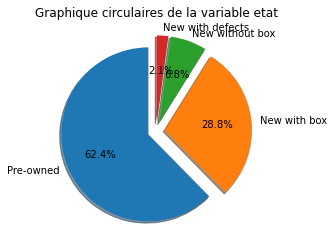

In [30]:
#Q8-les graphiques circulaires des variables quantitatives
pie1=df["etat"].value_counts()
pie1.to_dict()
def getList(dict):
    return dict.keys()
      

dict = pie1.to_dict()

plt.pie(pie1,labels=getList(dict),explode=explode(len(pie1)),radius=1,autopct="%1.1f%%",shadow=True,startangle=90)
plt.title("Graphique circulaires de la variable etat")
plt.show()

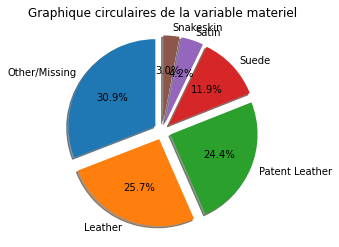

In [31]:
pie2=df["materiel"].value_counts()
pie2.to_dict()

      

dict = pie2.to_dict()

plt.pie(pie2,labels=getList(dict),explode=explode(len(pie2)),radius=1,autopct="%1.1f%%",shadow=True,startangle=90)
plt.title("Graphique circulaires de la variable materiel")
plt.show()

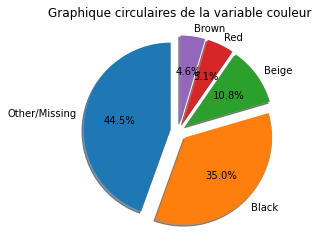

In [32]:
pie3=df["couleur"].value_counts()
pie3.to_dict()


dict = pie3.to_dict()

plt.pie(pie3,labels=getList(dict),explode=explode(len(pie3)),radius=1,autopct="%1.1f%%",shadow=True,startangle=90)
plt.title("Graphique circulaires de la variable couleur")
plt.show()

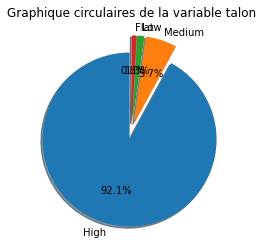

In [33]:
pie4=df["talon"].value_counts()
pie4.to_dict()
def getList(dict):
    return dict.keys()
      

dict = pie4.to_dict()

plt.pie(pie4,labels=getList(dict),explode=explode(len(pie4)),radius=1,autopct="%1.1f%%",shadow=True,startangle=90)
plt.title("Graphique circulaires de la variable talon")
plt.show()

In [66]:
import seaborn as sns 
sns.set_theme(style="darkgrid")

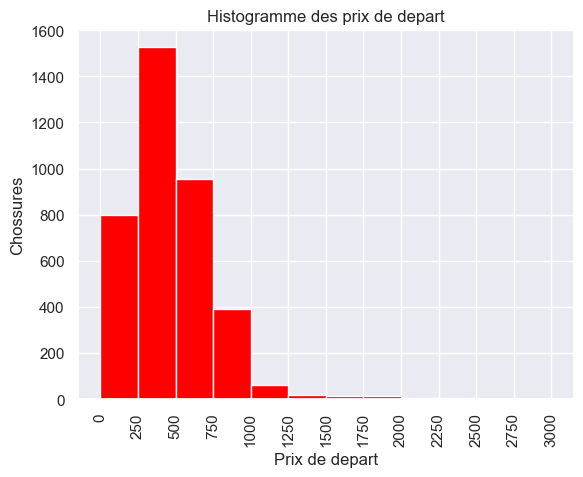

In [7]:
#Q9.1
bins=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000]
plt.hist(df.prixdepart,bins=bins,color="red")
plt.xticks(bins,rotation="vertical")
plt.xlabel("Prix de depart")
plt.ylabel("Chossures")
plt.title("Histogramme des prix de depart")
plt.show()

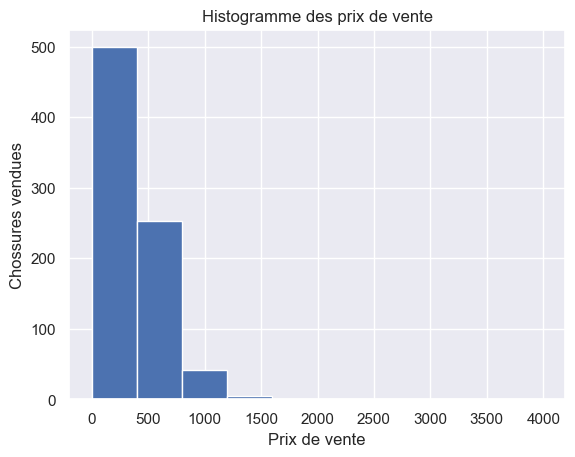

In [8]:
#Q9.2
plt.xlabel("Prix de vente")
plt.ylabel("Chossures vendues")
plt.hist(vendus.prixvente)
plt.title("Histogramme des prix de vente")
plt.show()

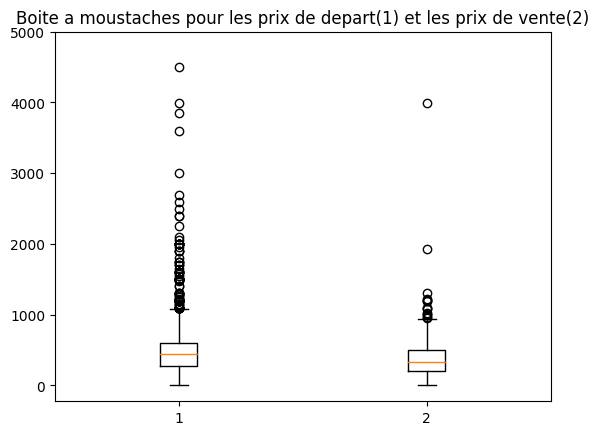

In [12]:
#Q.3 les boites a moustaches
bins2=[0,1000,2000,3000,4000,5000]
plt.style.use("default")
plt.boxplot([df.prixdepart,vendus.prixvente])
plt.yticks(bins2)
plt.title("Boite a moustaches pour les prix de depart(1) et les prix de vente(2)")
plt.show()

In [56]:
vendus

,enchere,vendus,prixdepart,prixvente,etat,taille,talon,style,couleur,materiel,diffprix
2,1,1,299.99,780.00,Pre-owned,8.5,High,Pump,Black,Other/Missing,480.01
3,1,1,49.99,561.00,Pre-owned,8.5,High,Pump,Black,Snakeskin,511.01
5,1,1,50.00,202.50,New with box,8.5,High,Platform,Black,Patent Leather,152.50
6,1,1,250.00,300.01,Pre-owned,10.0,NaN,Other/Missing,Black,Other/Missing,50.01
8,0,1,450.00,450.00,Pre-owned,9.0,High,Pump,Black,Patent Leather,0.00
...,...,...,...,...,...,...,...,...,...,...,...
3735,0,1,375.00,375.00,Pre-owned,8.0,High,Open Toe,Brown,Snakeskin,0.00
3738,0,1,180.00,180.00,Pre-owned,10.0,High,Platform,Other/Missing,Patent Leather,0.00
3741,0,1,599.00,599.00,New with box,8.5,High,Other/Missing,Black,Patent Leather,0.00
3775,0,1,499.00,499.00,New with box,9.0,High,Other/Missing,Black,Patent Leather,0.00


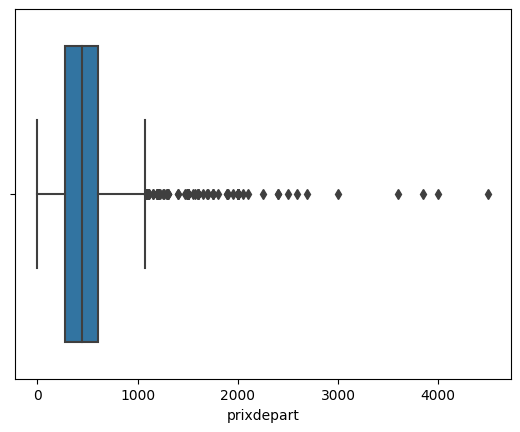

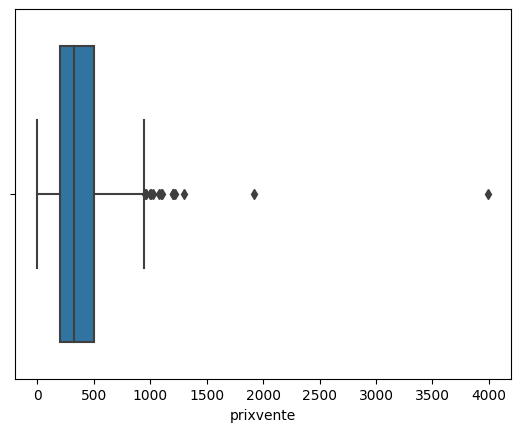

In [60]:
for i in [df.prixdepart,vendus.prixvente] :
    sns.boxplot(x= i ,data=vendus)
    plt.show()

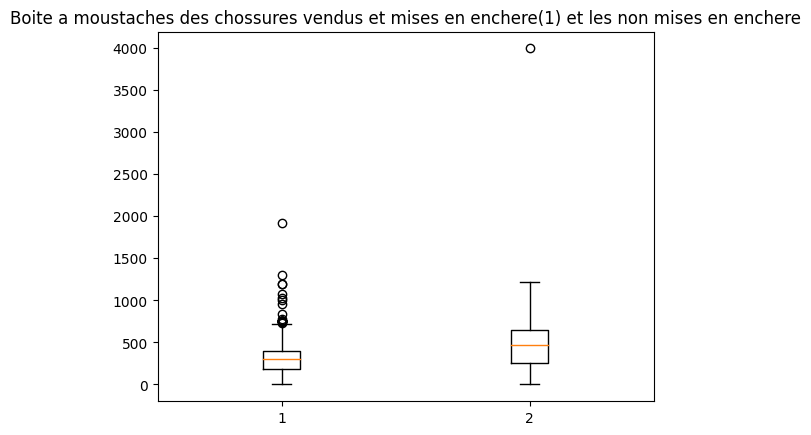

In [61]:
#Q10.1
enchere1=vendus.loc[vendus["enchere"]==1]
enchere0=vendus.loc[vendus["enchere"]==0]
plt.style.use("default")
plt.boxplot([enchere1.prixvente,enchere0.prixvente])
plt.title("Boite a moustaches des chossures vendus et mises en enchere(1) et les non mises en enchere")
plt.show()

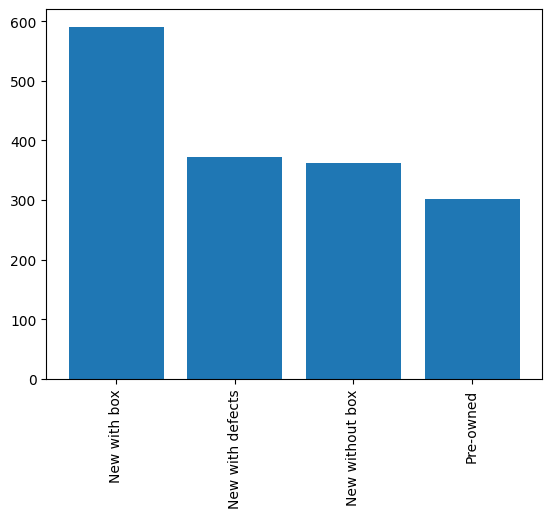

In [63]:
#Q10.2
et=vendus.groupby("etat")["prixvente"].mean()
v=[x for x ,i in vendus.groupby("etat")]
plt.bar(v,et)
plt.xticks(v,rotation="vertical")
#plt.title()
plt.show()

In [ ]:
#j'ai rencontrer des difficulté en dessinant l histogramme donc j'ai fait le Bar chart 

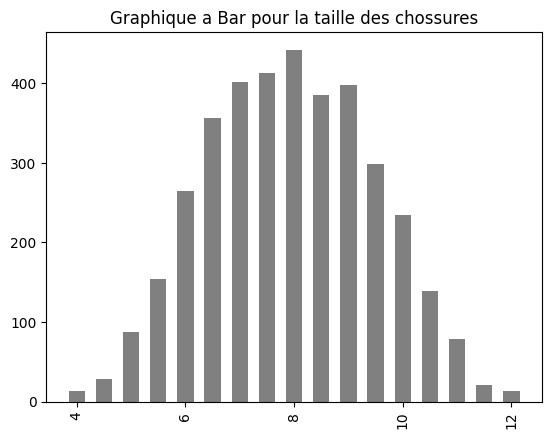

In [64]:
#Q11
taille=df["taille"].value_counts().sort_values(ascending=False)
taille.to_dict()
def getList(dict):
    return dict.keys()
      

dict = taille.to_dict()
plt.bar(getList(dict),taille,width=0.3,color="grey")
plt.xticks(rotation="vertical")
plt.title("Graphique a Bar pour la taille des chossures")
plt.show()

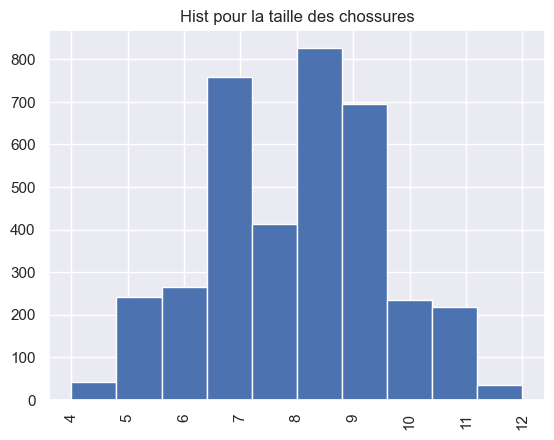

In [67]:
#Q11.2
plt.hist(df["taille"])
plt.xticks(rotation="vertical")
plt.title("Hist pour la taille des chossures")
plt.show()

In [ ]:
#Q11.3
#le graphique approprié a cette variable est l'histogramme car c'est des variables quantitatives 

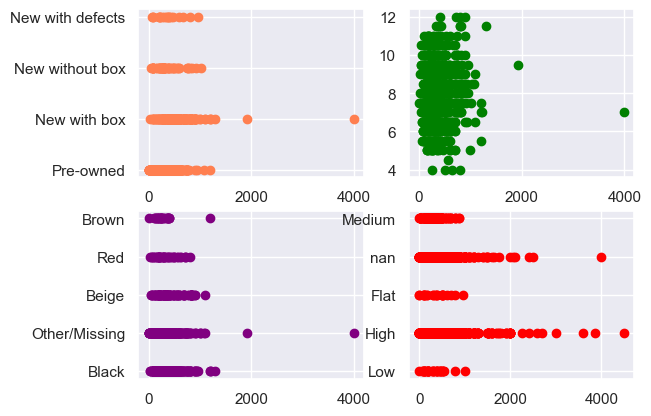

In [71]:
inte=df["talon"].apply(str)
plt.subplot(2,2,1)
plt.scatter(df["prixvente"],df["etat"],c="coral")
plt.subplot(2,2,2)
plt.scatter(df["prixvente"],df["taille"],c="green")
plt.subplot(2,2,3)
plt.scatter(df["prixvente"],df["couleur"],c="purple")
plt.subplot(2,2,4)
plt.scatter(df["prixdepart"],inte,c="red")
plt.show()

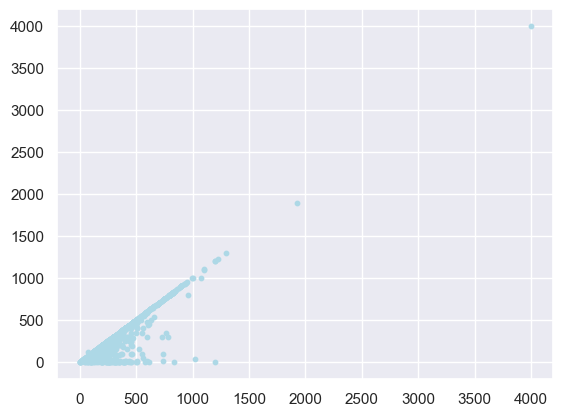

In [72]:
plt.scatter(df["prixvente"],df["prixdepart"],c="lightblue",s=10);